# Predictive Modeling of Income Levels based on Demographic and Employment Features

<img src = "income_3.jpg">

# Tasks : -
1. Importing Libraries
2. Preprocessing the data
3. Analyzing the numeric columns
4. Univariant and Bivariant analysis
5. Analyzing the category columns
6. Hypothesis Testing
7. Data Modelling
8. Encoding
9. Feature Scaling
10. Balancing the Dataset
11. Machine Learnings models- Logistic Regression, Random Forest Classifier, XGBoost, SVM
12. Analyzing Feature Importance
13. Comparing the models
14. Conclusion

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv('Data_inc.csv')
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


 From the ouput, we can observe that income is the target variable(<=50K and >50K) which serves as the basis for classification in the dataset. The data requires cleaning and preparation for further analysis and model training.

In [62]:
# Checking no. of rows and columns in the dataset
df.shape

(32561, 16)

In [63]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

Dataset has 32561 entries and 16 columns. Column 'Unnamed: 15' has 2 entries hence needs to be removed.

In [64]:
df.isnull().sum()

Age                     0
Profession Class        0
Final_census            0
 Education              0
 Education-num          0
 marital-status         0
 occupation             0
 relationship           0
 race                   0
Gender                  0
 capital-gain           0
 capital-loss           0
 hours-per-week         0
 country                0
 income                 0
Unnamed: 15         32559
dtype: int64

In [3]:
# Dropping the column :
df.drop('Unnamed: 15', axis=1, inplace=True)

In [66]:
df.shape

(32561, 15)

In [67]:
df.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
 Education          0
 Education-num      0
 marital-status     0
 occupation         0
 relationship       0
 race               0
Gender              0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 country            0
 income             0
dtype: int64

In [68]:
# Checking the unique values in the columns : 

for i in df.columns:
    print("****************",i,"*******************")
    print()
    print(set(df[i].tolist()))
    print()

**************** Age *******************

{17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90}

**************** Profession Class *******************

{' Without-pay', ' Local-gov', ' State-gov', ' Private', ' ?', ' Federal-gov', ' Self-emp-inc', ' Never-worked', ' Self-emp-not-inc'}

**************** Final_census *******************

{262153, 262158, 131088, 131091, 393248, 131117, 393264, 262196, 262208, 262233, 262241, 262244, 262245, 131178, 131180, 262280, 393354, 393357, 262285, 393360, 131224, 131230, 393376, 131239, 131258, 262345, 131275, 262352, 131288, 131298, 131302, 131309, 131310, 262402, 393480, 262409, 262425, 262439, 262446, 131379, 262478, 131414, 131417, 131425, 131435, 262511, 262515, 131459, 131461, 131463, 131473, 262552, 262570

# Columns having "?" :
occupation, country, Profession Class - these columns were found having " ? " as values which can be replaced by the most occuring value in that column. 

In [4]:
df[' occupation'] = np.where(df[' occupation']==' ?',' Prof-specialty',df[' occupation'])
df[' country'] = np.where(df[' country']==' ?',df[' country'].mode(),df[' country'])
df['Profession Class'] = np.where(df['Profession Class']==' ?',df['Profession Class'].mode(),df['Profession Class'])

In [70]:
# Description about the dataset
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 The descriptive analysis shows:
 * The presence of outliers in 'capital-gain' and 'capital-loss'
 * The dataset includes people fro  age of 17 to 90
 * The minimum of education years shows that there are people who have gone to school for 1 year only

In [5]:
# Replacing the values in income column with 1 and 0
df[' income'] = np.where(df[' income']==' >50K',1,0)

In [72]:
df[' income'].value_counts()

0    24720
1     7841
Name:  income, dtype: int64

# Visualization

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


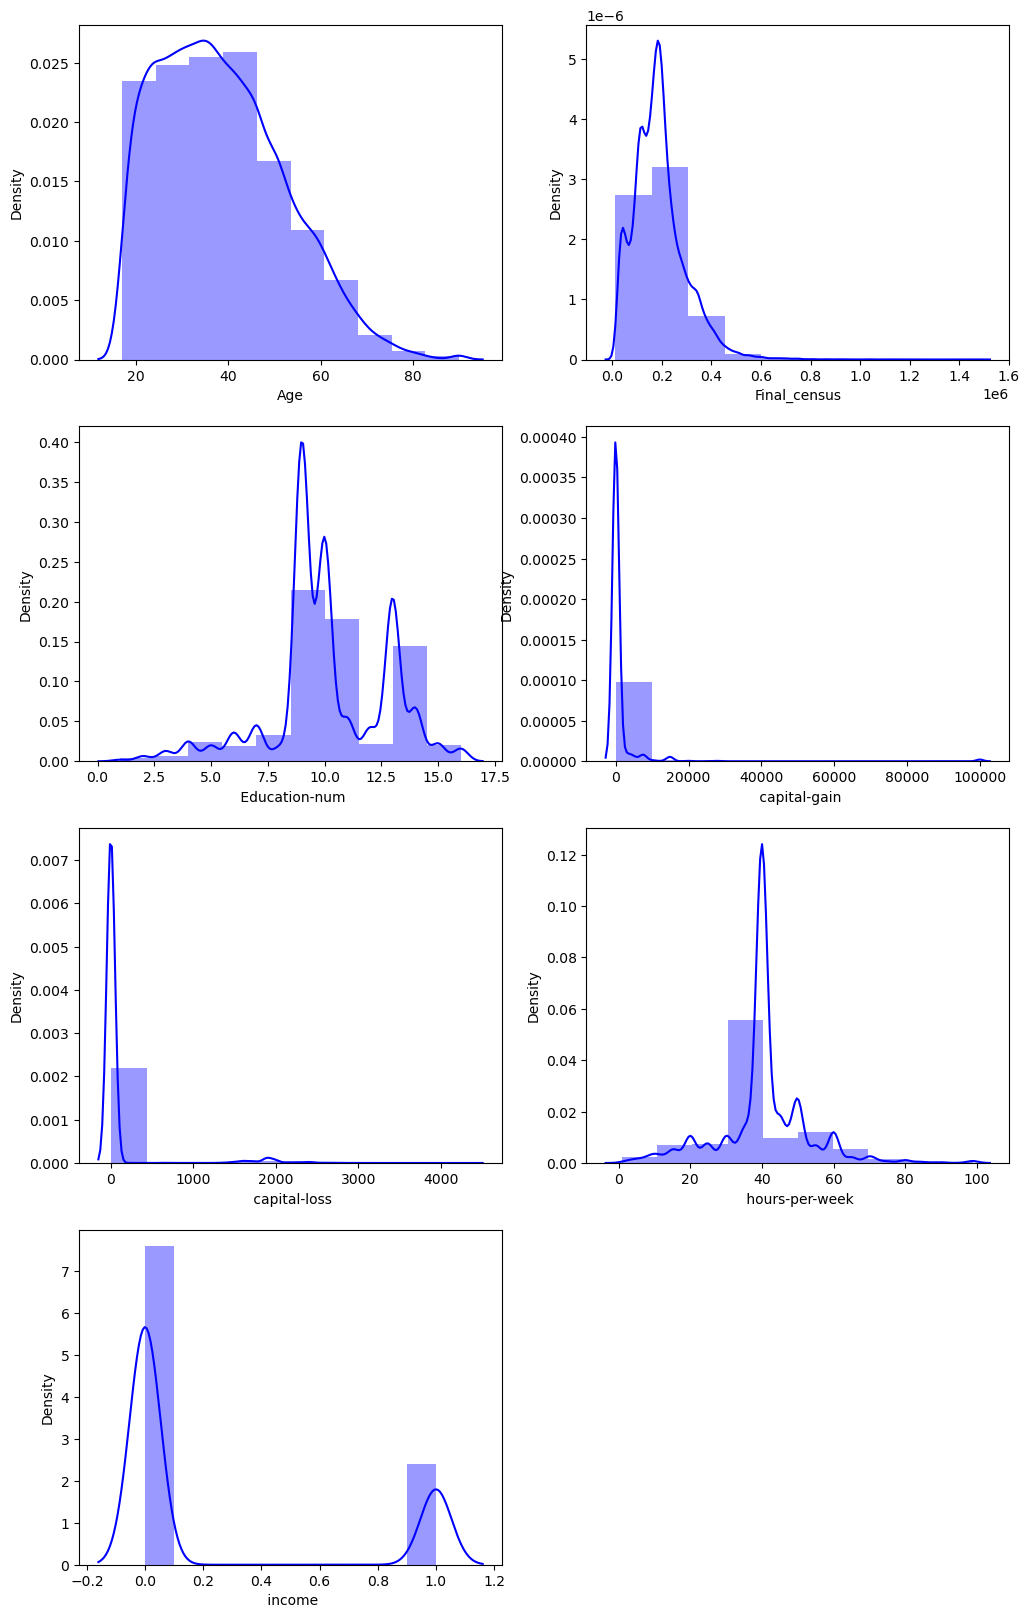

In [74]:
# Distribution of data using distplot
plot_number = 1
plt.figure(figsize=(12,20))
for i in list (df.select_dtypes(exclude=['object']).columns)[0:]:
    plt.subplot(4,2,plot_number)
    sns.distplot(df[i],bins=10, color='Blue')
    plot_number +=1
plt.show()

## Insights
1. Age Distribution : It shows a roughly normal distribution, indicating most that mostly people in dataset are of 20-50 years old.
2. Distribution of hours_per_week : the values are approximately normally distributed, peak(the maximum value) is 40 hours_per_week.
3. Distribution of capital_gain and capital_loss : In both the distribution, right skewness can be seen in the dataset. This indicates that only some people may be already rich have purchase/sell property etc. and has increased their income.
4. Income Distribution : It mirrors the values present i.e. 0 and 1. Distribution shows lower income values(0) are more than the higher income level(1). 

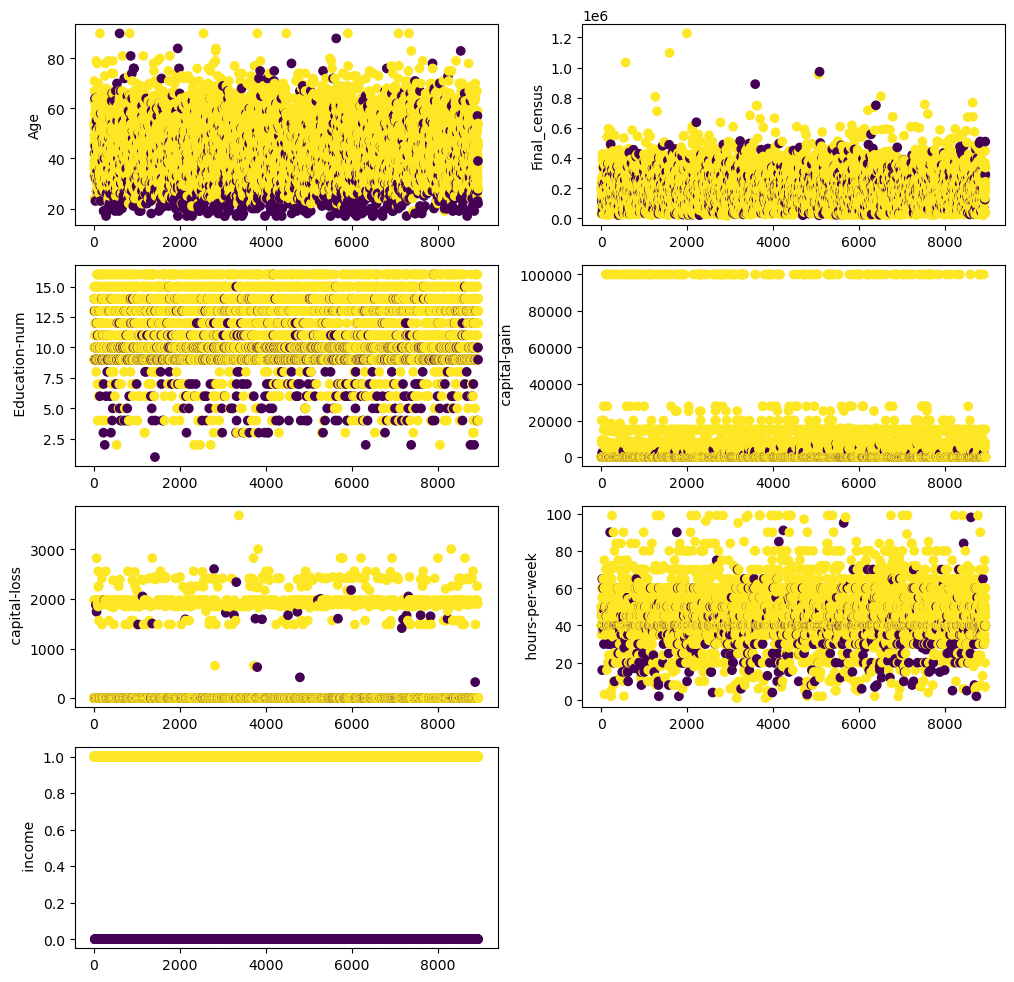

In [12]:
#### Visualizing numeric columns ######

numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns

high_income = numeric_cols.loc[numeric_cols[' income']==1, :]
low_income = numeric_cols.loc[numeric_cols[' income']==0,:]

low_income_sub = low_income.sample(n=1100, replace=False)

new_df = pd.concat([high_income, low_income_sub], axis=0) # has a balanced data

new_df = new_df.sample(frac=1)

new_df.reset_index(drop=True, inplace=True)

column_names = list(new_df.columns)

plot_number = 1
plt.figure(figsize=(12,12))
for i in list (new_df.columns)[0:]:
    plt.subplot(4,2,plot_number)
    plt.scatter(y = new_df[i],x=new_df.index, c= new_df[' income'])
    plt.ylabel(i)
    plot_number +=1
plt.show()

# Observations :-
1. Yellow Dots represent the higher income group.
2. Blue Dots represent the lower income group.
3. Age - Lower age group has high proportion of lower income group. Middle age group has both while upper age has more higher group income.
4. Final_Census which represent the population of the country shows no special relation with the income group.
5. Higher the eduction years more likely into the higher income group. Less education years has more lower income group.
6. Higher Capital Gain fully belongs to higher income group. Lower Income Group has very low chance of being in Higher income group.
7. Capital Loss is faced by both the income groups.
8. Hours_per_week - Both the group are doing the hardwork. But more than 70 hours_per_week has more higher income group. But very less working hours also has presence of higher income group.
9. From the scatterplot between age, hours_per_week and income, we observe that a person needs to be >30 to be earning more than 50K, else needs to work at least 60 hours_per_week to earn >50K.


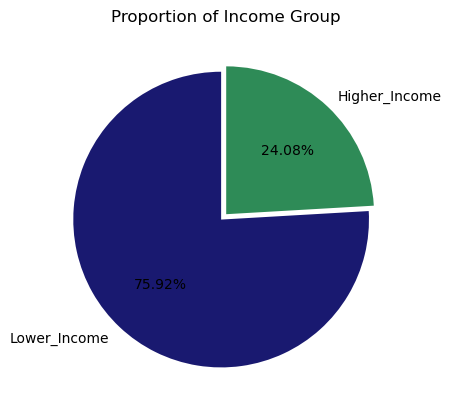

In [76]:
# Visualizing the target variable :-
y = df[' income'].value_counts()
mylabel = ['Lower_Income','Higher_Income']
myexplode=[0.05,0]
plt.pie(y, labels=mylabel,colors = ['MidNightBlue','seagreen'],explode=myexplode,autopct='%.2f%%',startangle=90)
plt.title("Proportion of Income Group")
plt.show()

### 24.08% data belongs to >=50K while 75.92% is lower income group i.e. 75.92%
This indicates the imbalance in the dataset that could affect the performance of machine learning models due to overrepresentation of lower income level samples. This imbalance would need to be dealt while training machine learning models to ensure accurate predictions.

### Univariant Analysis

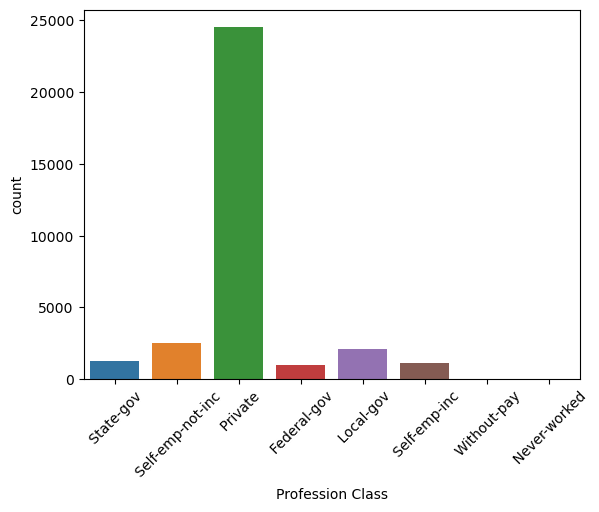

In [77]:
sns.countplot(df['Profession Class'])
plt.xticks(rotation=45)
plt.show()

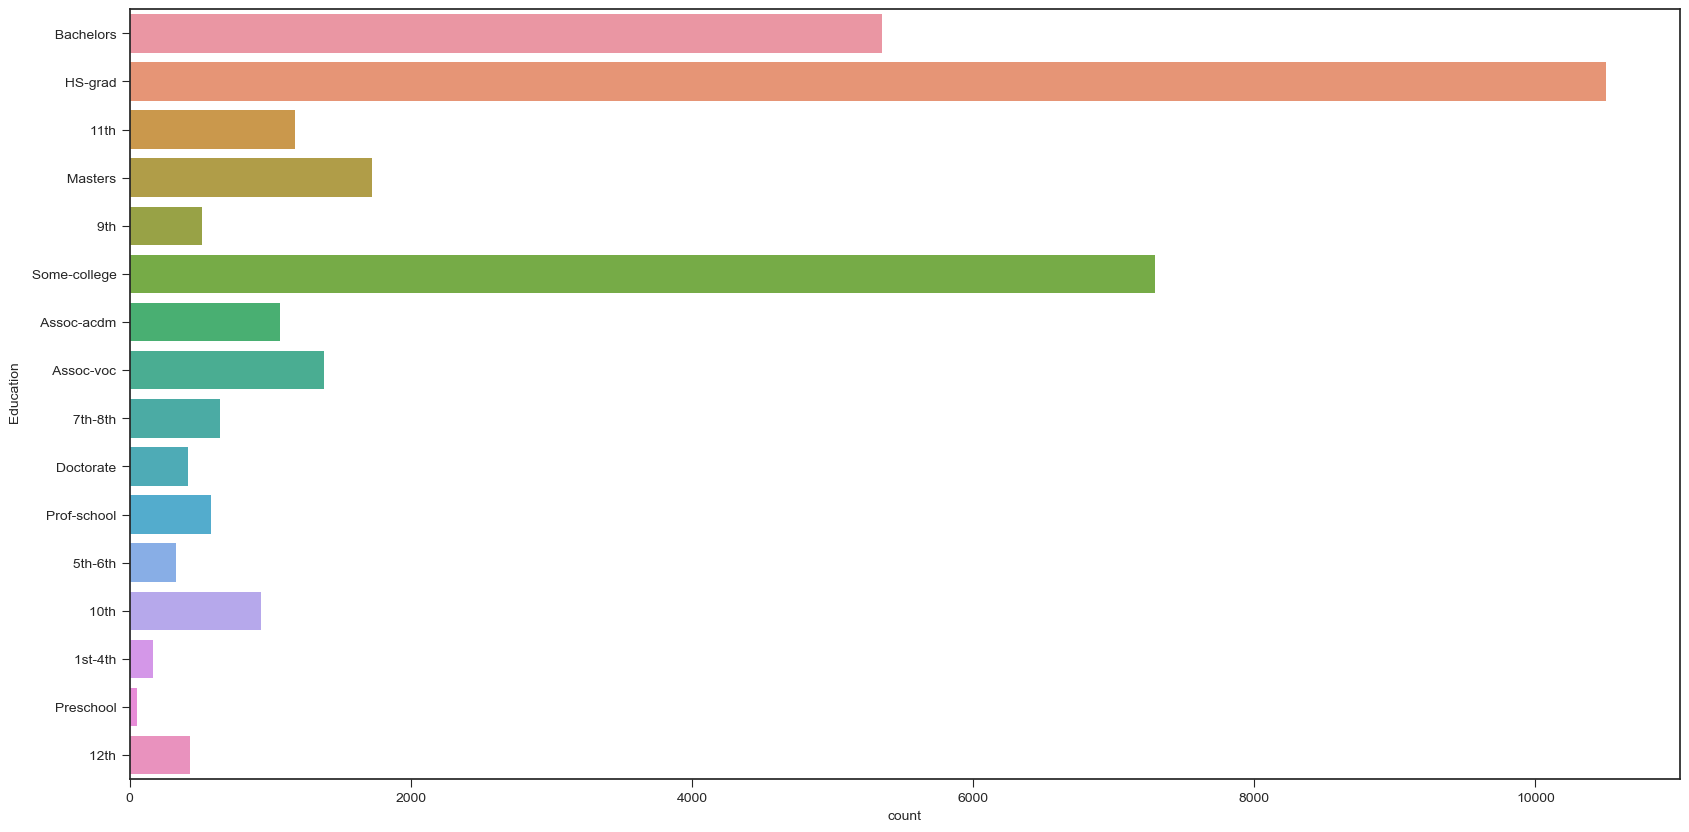

In [78]:
fig = plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
sns.countplot(y=' Education', data=df)
plt.show()

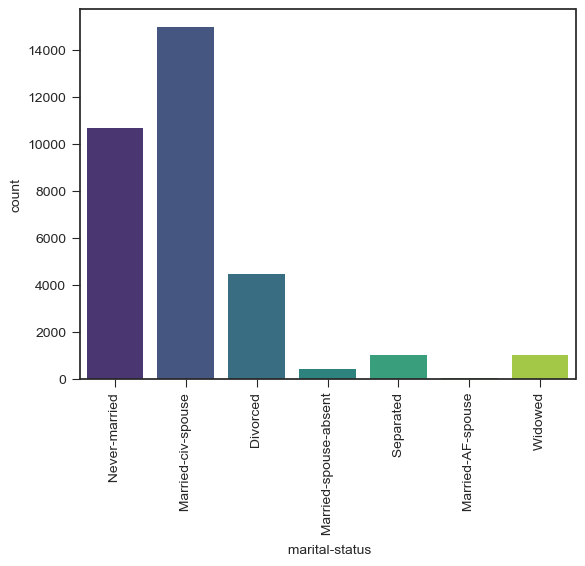

In [79]:
sns.countplot(df[' marital-status'], palette='viridis')
plt.xticks(rotation=90)
plt.show()

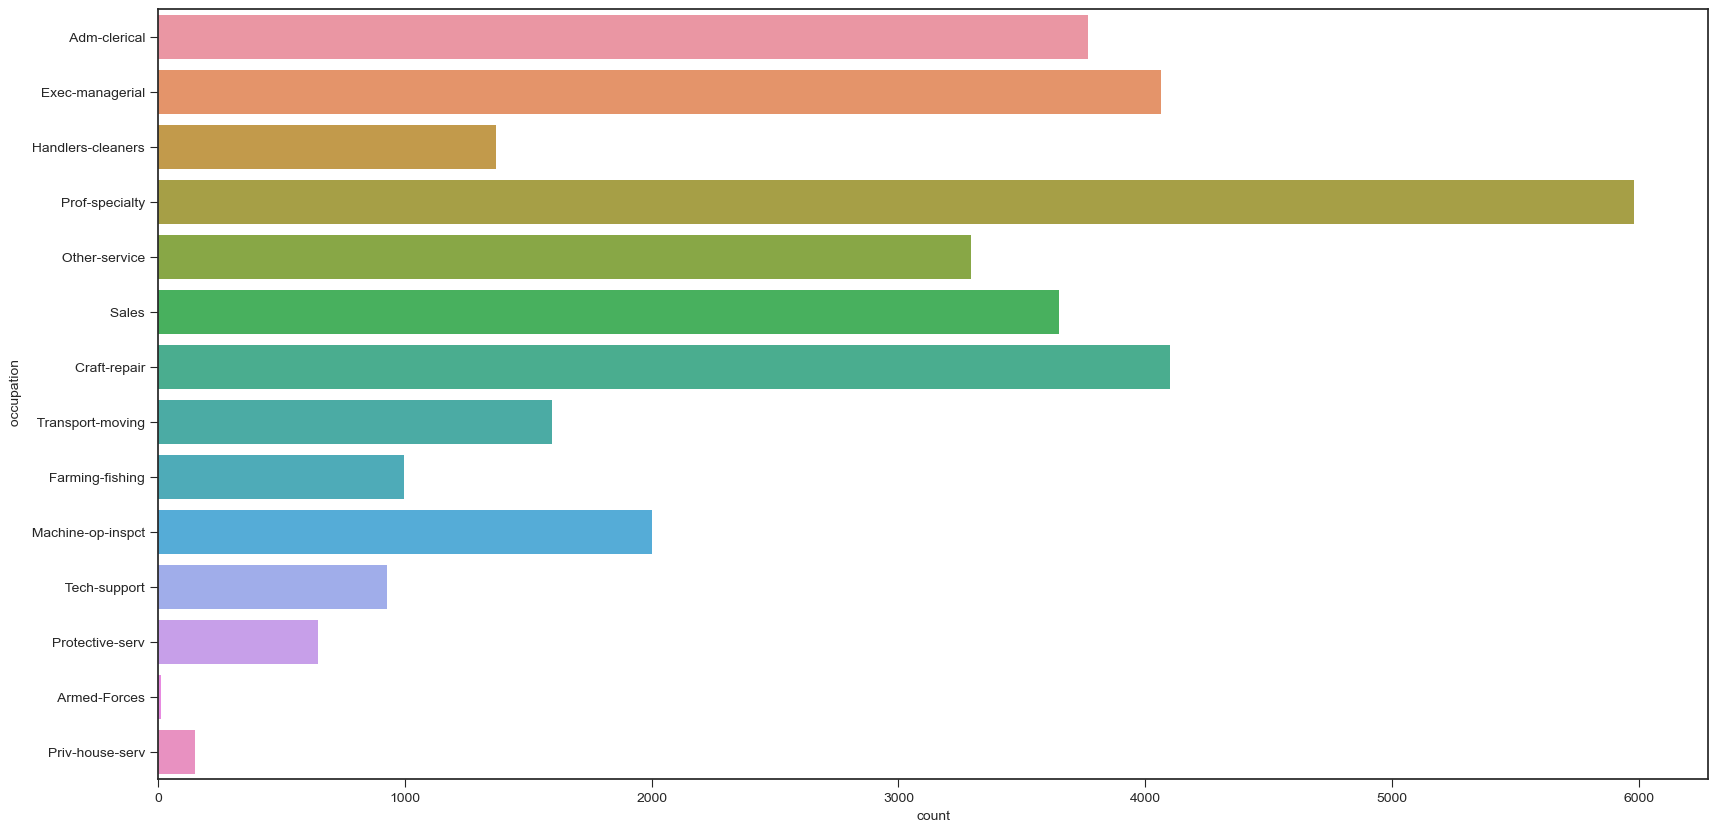

In [80]:
fig = plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
sns.countplot(y=' occupation', data=df)
plt.show()

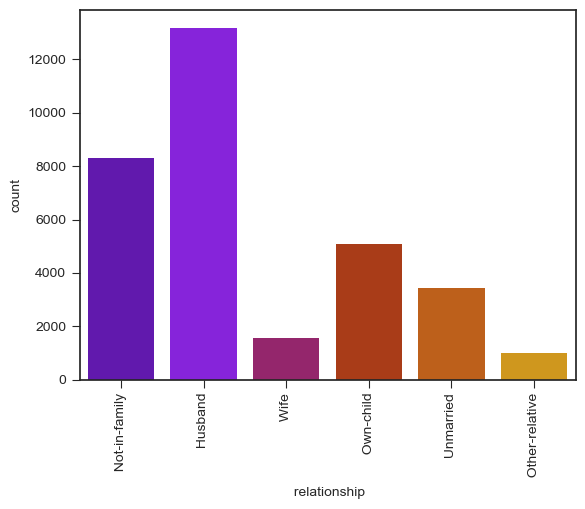

In [81]:
sns.countplot(df[' relationship'], palette='gnuplot')
plt.xticks(rotation=90)
plt.show()

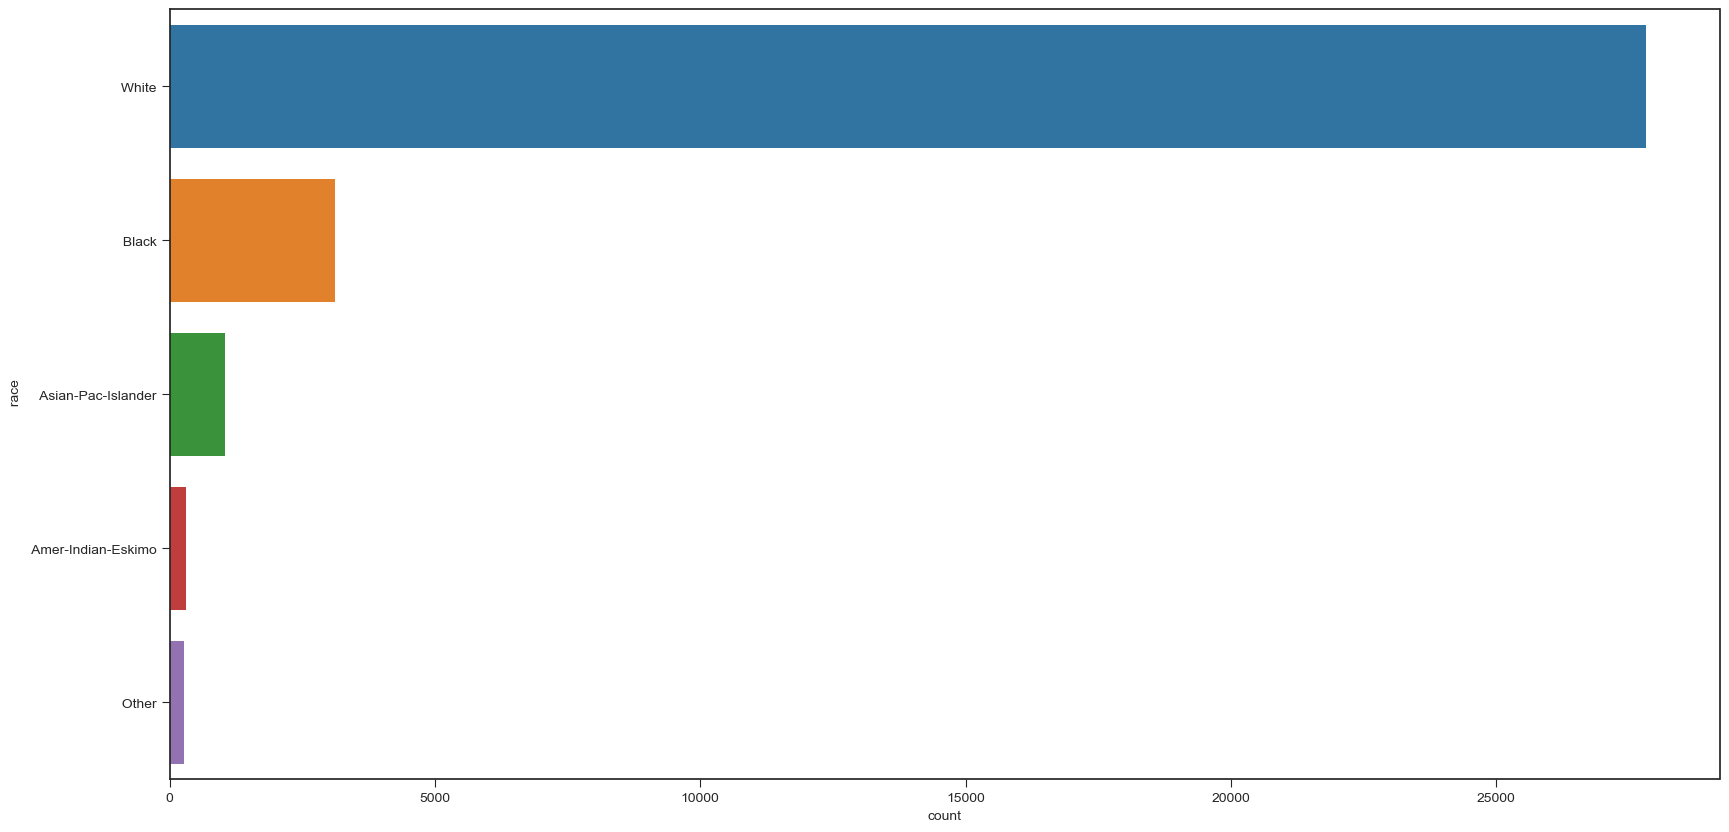

In [82]:
fig = plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
sns.countplot(y=' race', data=df)
plt.show()

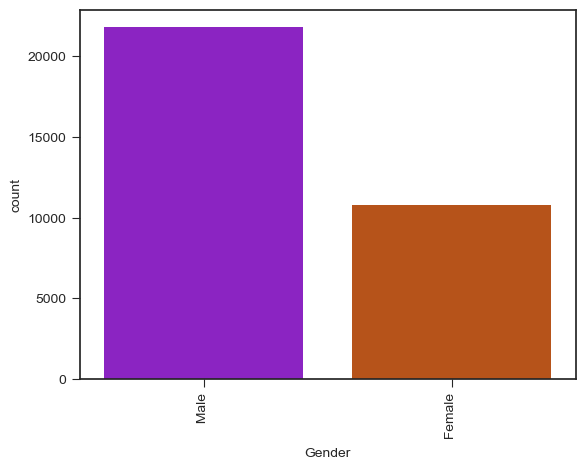

In [83]:
sns.countplot(df['Gender'], palette='gnuplot')
plt.xticks(rotation=90)
plt.show()

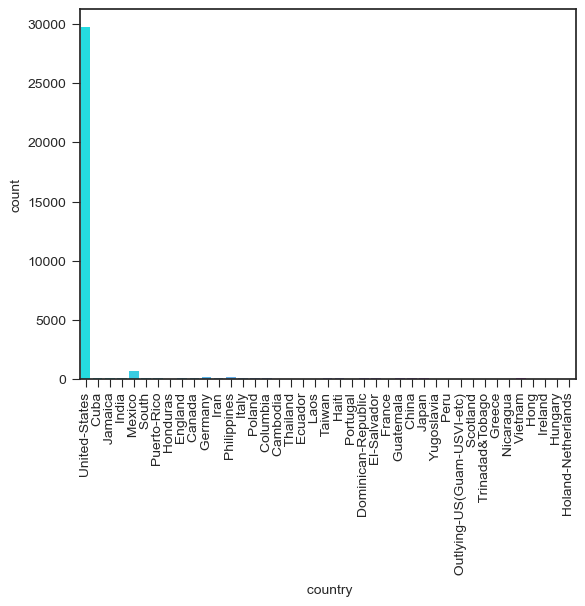

In [84]:
sns.countplot(df[' country'], palette='cool')
plt.xticks(rotation=90)
plt.show()

# Insights 
* The no. of people working in private firm is very high as compared to others.
* The ratio of people attending HS-Grad, some college and Bachelors is very high while masters, Doctorate has very less attenders.
* Adm-clerical, Sales, Prof-Speciality and Crafts-Repair have the largest share in the occupation.
* Husbands in relationship and male in gender are in large number.
* The no. of people belonging to White race is on the top while the Black race is on second.
* Since the dataset belongs to United States, native country as United-States is maximum, a considerable share from Mexico is also present in dataset. 

# Bivariant Analysis

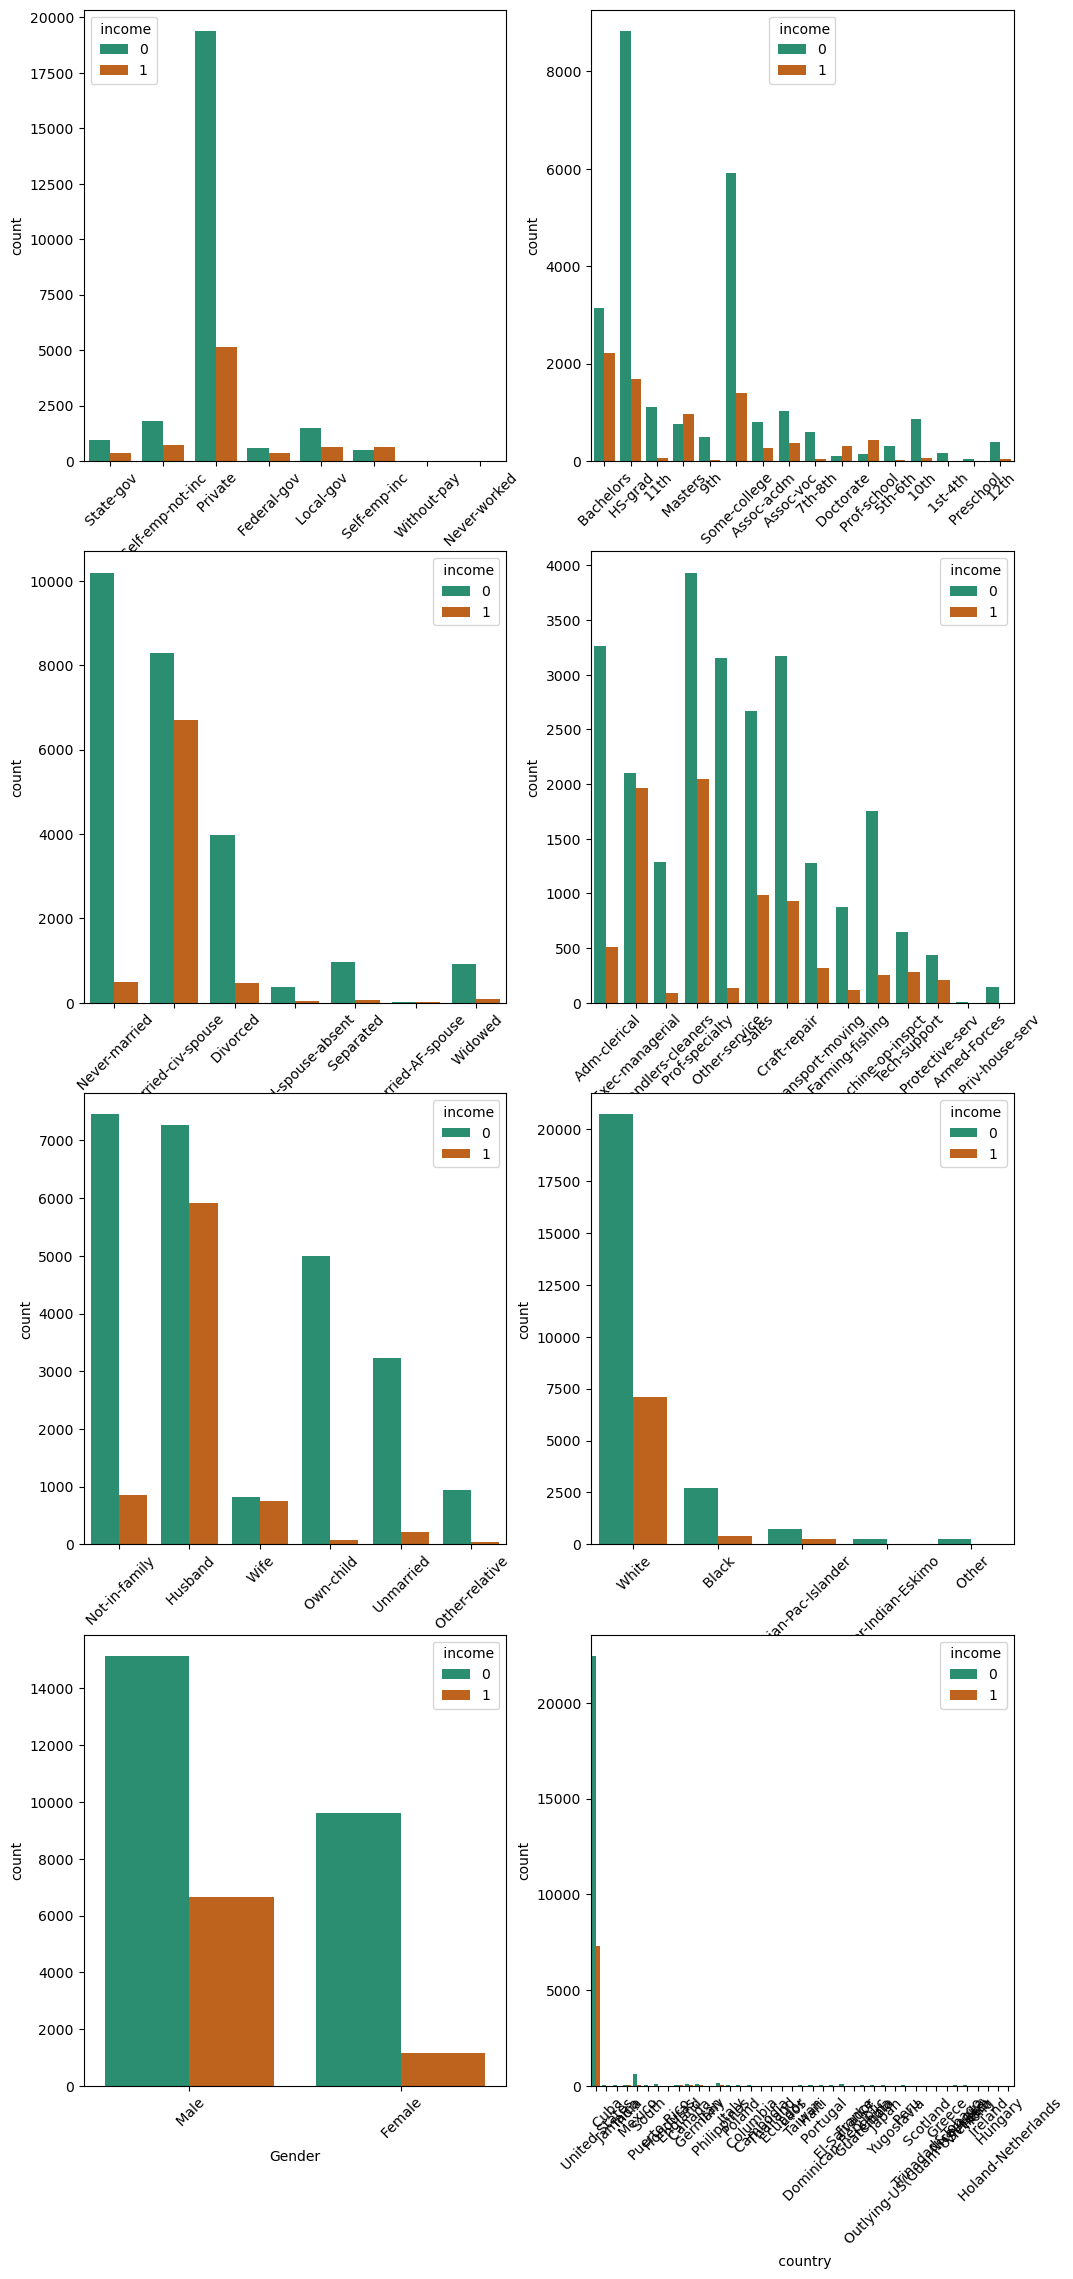

In [13]:
# Bivarient Analysis

plot_number = 1
plt.figure(figsize=(12,34))
for i in list(df.select_dtypes(include=['object']).columns)[0:]:
    plt.subplot(5,2,plot_number)
    sns.countplot(df[i], palette='Dark2',hue = df[' income']) 
    plt.xticks(rotation=45)
    plot_number+=1

plt.show()    

# Observations : - 
1. A person has high chance of earning >50K in case his/her race is ‘White’.

2. Males have a higher chance of earning more than 50K, than females.

3. Ratio of people earning more than 50K is higher in case Workclass is ‘Self-emp-inc’.

4. People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has a good ratio of <=50K : >50K.

5. If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.

## Occupation vs. Income Level with Age

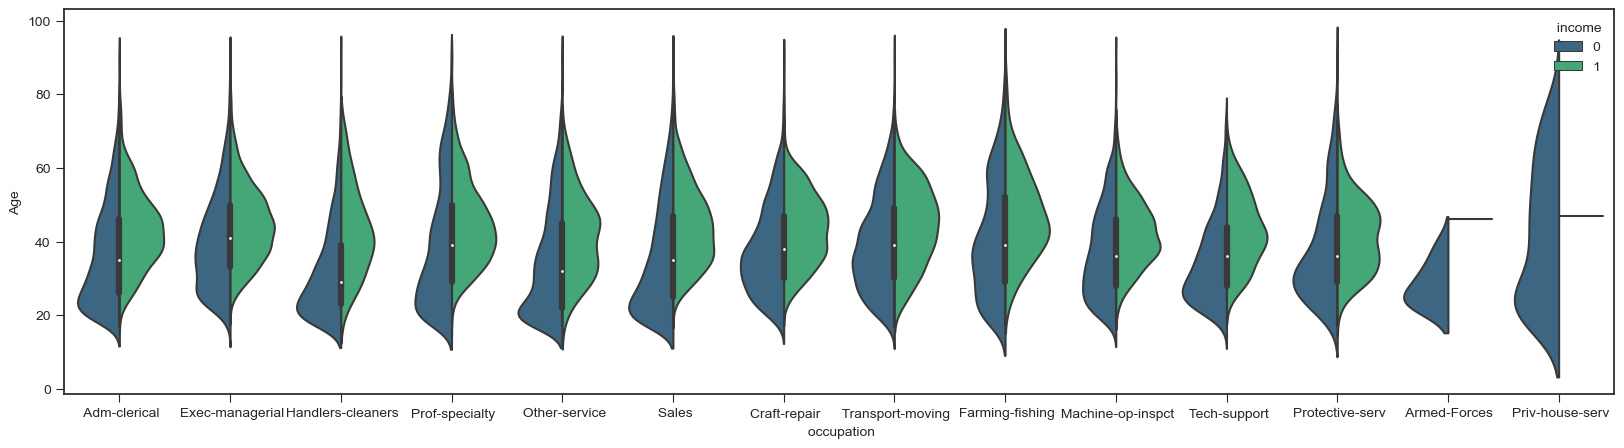

In [86]:
plt.figure(figsize=(20,5))
sns.violinplot(x=" occupation", y="Age", hue=" income",
                    data=df, gridsize=100, palette="viridis", split=True, saturation=0.75)
plt.show()

# Observation :-
The general trend is: more senior workers have higher salaries. Armed-forces and Priv-house-service don't have a high job salaries.

Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs.

## Race vs. Income-Level

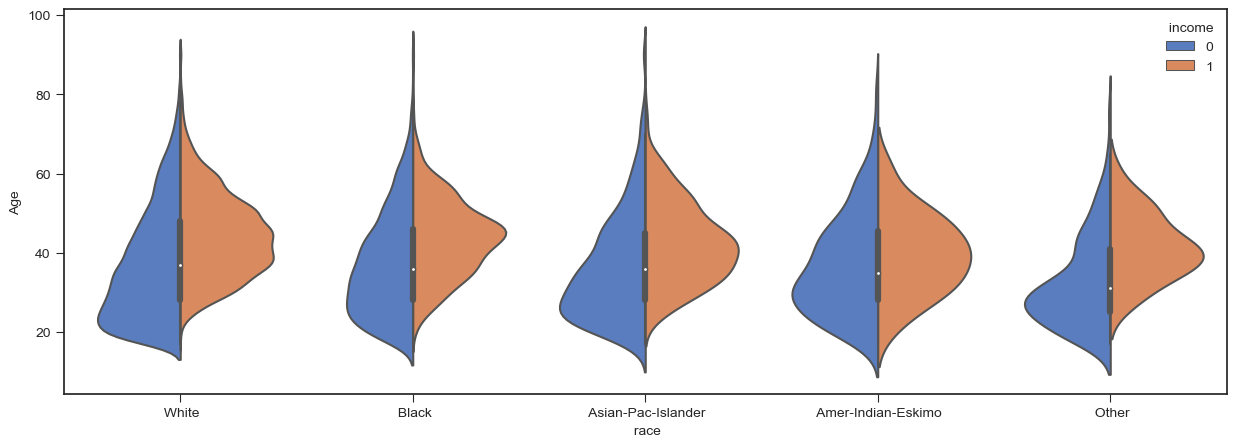

In [87]:
plt.figure(figsize=(15,5))
sns.violinplot(x=" race", y="Age", hue=" income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
plt.show()

# CORRELATION MAP

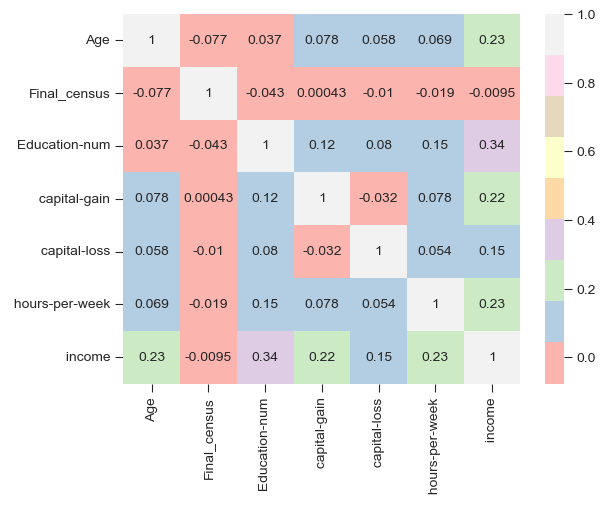

In [88]:
sns.heatmap(df.corr(), annot=True, cmap = 'Pastel1')
plt.show()

Income has 34% correlation with ‘Education_num’, 23% correlation with ‘hours_per_week’ and ‘age’, and 22% correlation with ‘Capital_gain’. The correlations are moderate. Final_census has very weak correlation with the income.

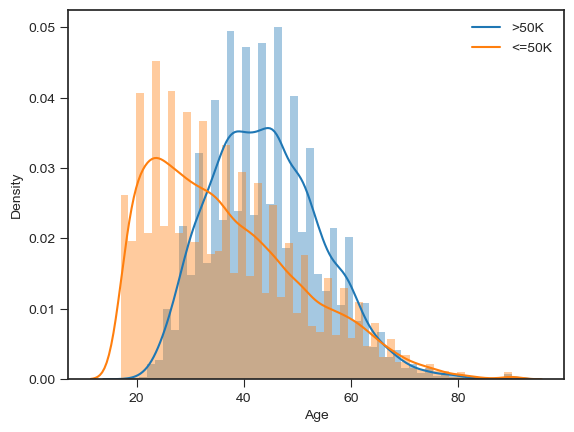

In [89]:
sns.distplot(df[df[' income'] == 1]['Age'], kde_kws={"label": ">50K"})
sns.distplot(df[df[' income'] == 0]['Age'], kde_kws={"label": "<=50K"})
plt.legend()
plt.show()

# Hypothesis Testing

### Case 1 : Checking the relation between Education and income level
H0 = There is no significant relationship between education and income level.

Ha = There is significant relationship between education and income level.


In [6]:
df_high = df[df[' income']==1] 
df_low = df[df[' income']==0]

In [91]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(df_high[" Education-num"],df_low[" Education-num"])
print(p_value)

0.0


Since p_value < 0.05, Reject the null hypothesis and accept the alternate hypothesis

### Case 2 : Checking the relation between  hours-per-week and income level
H0 = There is no significant relationship between  hours-per-week and income level.

Ha = There is significant relationship between  hours-per-week and income level.

In [92]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(df_high[" hours-per-week"],df_low[" hours-per-week"])
print(p_value)

0.0


Here, p_value<0.05, Reject the null hypothesis and accept the Alternate Hypothesis.

### Case 3 : Checking the relation between Final_census and income level
H0 = There is no significant relationship between Final_census and income level.

Ha = There is significant relationship between Final_census and income level.

In [8]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(df_high["Final_census"],df_low["Final_census"])
print(p_value)

0.08773666108063947


In this case p_value > 0.05, Hence we cannot reject the null hypothesis. Accept the Null Hypothesis

# Data Modelling

## Transforming the columns

In [7]:
data = df.copy()

In [8]:
# Education :
data[' Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Education, dtype: int64

In [9]:
# Putting all relevant to school in the school category
data[' Education'].replace(' Preschool', 'School',inplace=True)
data[' Education'].replace(' 1st-4th', 'School',inplace=True)
data[' Education'].replace(' 5th-6th', 'School',inplace=True)
data[' Education'].replace(' 7th-8th', 'School',inplace=True)
data[' Education'].replace(' 9th', 'School',inplace=True)
data[' Education'].replace(' 10th', 'School',inplace=True)
data[' Education'].replace(' 11th', 'School',inplace=True)
data[' Education'].replace(' 12th', 'School',inplace=True)

# Doctorate and Prof-school into one category
data[' Education'].replace(' Doctorate', 'Doctorate',inplace=True)
data[' Education'].replace(' Prof-school', 'Doctorate',inplace=True)

data[' Education'].replace(' Assoc-acdm', 'College',inplace=True)
data[' Education'].replace(' Assoc-voc', 'College',inplace=True)
data[' Education'].replace(' HS-grad', 'College',inplace=True)
data[' Education'].replace(' Some-college', 'College',inplace=True)

data[' Education'].replace(' Bachelors', 'Bachelors',inplace=True)
data[' Education'].replace(' Masters', 'Masters',inplace=True)

In [10]:
data[' Education'].value_counts()

College      20241
Bachelors     5355
School        4253
Masters       1723
Doctorate      989
Name:  Education, dtype: int64

In [11]:
data[[' Education', ' Education-num']].groupby([' Education'], as_index=False).mean().sort_values(by=' Education-num', ascending=False)

,Education,Education-num
2,Doctorate,15.417594
3,Masters,14.000000
0,Bachelors,13.000000
1,College,9.654908
4,School,5.602398


In [12]:
# Marital_Status
data[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [13]:
data[' marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
data[' marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
data[' marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
data[' marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
data[' marital-status'].replace([' Separated'], 'No Spouse',inplace=True)
data[' marital-status'].replace([' Divorced'], 'No Spouse',inplace=True)
data[' marital-status'].replace([' Widowed'], 'No Spouse',inplace=True)

In [14]:
data[' marital-status'].value_counts()

Married       14999
NotMarried    11101
No Spouse      6461
Name:  marital-status, dtype: int64

In [15]:
# Relationship
data[' relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64

In [16]:
data[' relationship'].replace([' Husband'], 'Husband',inplace=True)
data[' relationship'].replace([' Not-in-family'], 'Other',inplace=True)
data[' relationship'].replace([' Own-child'], 'Other',inplace=True)
data[' relationship'].replace([' Unmarried'], 'Other',inplace=True)
data[' relationship'].replace([' Wife'], 'Wife',inplace=True)
data[' relationship'].replace([' Other-relative'], 'Other',inplace=True)

In [17]:
data[' relationship'].value_counts()

Other      17800
Husband    13193
Wife        1568
Name:  relationship, dtype: int64

In [18]:
data['Profession Class'].replace([' Without-pay'], 'Unemployed',inplace=True)
data['Profession Class'].replace([' Never-worked'], 'Unemployed',inplace=True)

In [19]:
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,NotMarried,Adm-clerical,Other,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,College,9,No Spouse,Handlers-cleaners,Other,White,Male,0,0,40,United-States,0
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


## One-Hot Encoding

In [21]:
data = pd.get_dummies(data, columns=['Profession Class',' Education',' marital-status',' occupation',
                                     ' relationship',' race' ,'Gender',' country'], drop_first=True)

In [22]:
data.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Profession Class_ Local-gov,Profession Class_ Private,Profession Class_ Self-emp-inc,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Splitting into dependent and independent variable
X = data.drop([' income','Final_census'], axis = 1)
Y = data[[' income']]

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
pd.DataFrame(X_sc, columns=X.columns)

,Age,Education-num,capital-gain,capital-loss,hours-per-week,Profession Class_ Local-gov,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,-0.262097,-1.747977,-0.188389,-0.290936,4.907700,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,-0.262097,-1.747977,-0.188389,3.437186,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,-0.262097,0.572090,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,-0.262097,0.572090,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,-0.262097,0.572090,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.746039,-0.145920,-0.21666,-0.197409,-0.262097,0.572090,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32557,0.103983,-0.420060,-0.145920,-0.21666,-0.035429,-0.262097,0.572090,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32558,1.423610,-0.420060,-0.145920,-0.21666,-0.035429,-0.262097,0.572090,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32559,-1.215643,-0.420060,-0.145920,-0.21666,-1.655225,-0.262097,0.572090,-0.188389,-0.290936,-0.203761,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173


## Balancing the dataset : SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm, Y_sm = sm.fit_resample(X_sc, Y)
print(Y.value_counts())
print(Y_sm.value_counts())

 income
0          24720
1           7841
dtype: int64
 income
0          24720
1          24720
dtype: int64


In [26]:
# Splitting the data into the train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,Y_sm, test_size=0.2, random_state = 42)

In [27]:
print(x_train.shape,x_test.shape)

(39552, 77) (9888, 77)


In [65]:
train_accu = [] # list to store the accuracy value
test_accu = []
train_mean = []
test_mean = []

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

#Predictions
y_pred_train_log = log.predict(x_train)
y_pred_test_log = log.predict(x_test)

In [66]:
# Evaluating the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy Score
train_accu_log = accuracy_score(y_train,y_pred_train_log)
test_accu_log = accuracy_score(y_test,y_pred_test_log)
print("Training Accuracy :",train_accu_log)
print()
print("Testing Accuracy :",test_accu_log)
train_accu.append(accuracy_score(y_train,y_pred_train_log))
test_accu.append(accuracy_score(y_test,y_pred_test_log) )

Training Accuracy : 0.8242819579288025

Testing Accuracy : 0.8257483818770227


In [31]:
# Classification Report
print(classification_report(y_train,y_pred_train_log))
print()
print(classification_report(y_test,y_pred_test_log))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     19782
           1       0.81      0.85      0.83     19770

    accuracy                           0.82     39552
   macro avg       0.83      0.82      0.82     39552
weighted avg       0.83      0.82      0.82     39552


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4938
           1       0.80      0.86      0.83      4950

    accuracy                           0.83      9888
   macro avg       0.83      0.83      0.83      9888
weighted avg       0.83      0.83      0.83      9888



In [32]:
# Confusion matrix
print("Confusion Matrix of Training")
print(confusion_matrix(y_train,y_pred_train_log))
print()
print("Confusion Matrix of Testing")
print(confusion_matrix(y_test,y_pred_test_log))

Confusion Matrix of Training
[[15774  4008]
 [ 2942 16828]]

Confusion Matrix of Testing
[[3890 1048]
 [ 675 4275]]


In [73]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(log, x_train, y_train, cv=10)
test_accuracy = cross_val_score(log, x_test, y_test, cv=10)
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Test Mean Accuracy", test_accuracy.mean())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Mean Accuracy 0.8231443731872339

Test Mean Accuracy 0.8199836869532469


# ROC AOC Curve

In [34]:
from sklearn.metrics import roc_auc_score
log_roc_auc = roc_auc_score(y_test, y_pred_test_log)
log_roc_auc

0.8257023454471815

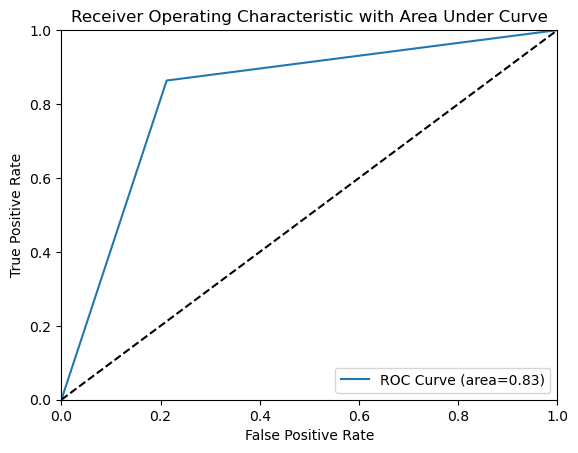

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_log)

plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %log_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(max_depth=20, min_samples_leaf=1)
rfr.fit(x_train,y_train)

#predictions
train_pred_rfr = rfr.predict(x_train)
test_pred_rfr = rfr.predict(x_test)

# Acccuracy Score
print("Training Accuracy : ",accuracy_score(y_train,train_pred_rfr))
train_accu.append(accuracy_score(y_train,train_pred_rfr))
print()
print("Testing Accuracy : ",accuracy_score(y_test,test_pred_rfr))
test_accu.append(accuracy_score(y_test,test_pred_rfr))

Training Accuracy :  0.9159081715210357

Testing Accuracy :  0.8779328478964401


In [37]:
# Classiciation Report
print(classification_report(y_train,train_pred_rfr))
print()
print(classification_report(y_test,test_pred_rfr))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     19782
           1       0.88      0.97      0.92     19770

    accuracy                           0.92     39552
   macro avg       0.92      0.92      0.92     39552
weighted avg       0.92      0.92      0.92     39552


              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4938
           1       0.84      0.93      0.88      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888



In [38]:
# Confusion_Matrix
print("Confusion Matrix of Training")
print(confusion_matrix(y_train,train_pred_rfr))
print()
print("Confusion Matrix of Testing")
print(confusion_matrix(y_test,test_pred_rfr))

Confusion Matrix of Training
[[17180  2602]
 [  679 19091]]

Confusion Matrix of Testing
[[4061  877]
 [ 330 4620]]


In [74]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfr, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rfr, x_test, y_test, cv=10)
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Test Mean Accuracy", test_accuracy.mean())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Mean Accuracy 0.8729268476631059

Test Mean Accuracy 0.8638746863269242


In [42]:
# ROC_AUC_Curve
from sklearn.metrics import roc_auc_score
rfr_roc_auc = roc_auc_score(y_test, test_pred_rfr)
rfr_roc_auc

0.8778655326042932

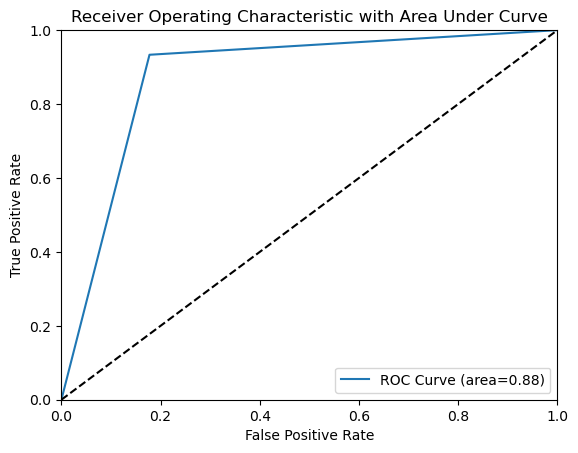

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_rfr)

plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %rfr_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

#Predictions
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [69]:
# Accuracy_Score
print("Training Accuracy", accuracy_score(y_train, y_pred_train_xgb))
train_accu.append(accuracy_score(y_train,y_pred_train_xgb))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_xgb))
test_accu.append(accuracy_score(y_test,y_pred_test_xgb))

Training Accuracy 0.9203327265372169

Test Accuracy 0.905542071197411


In [46]:
# Classiciation Report
print(classification_report(y_train,y_pred_train_xgb))
print()
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     19782
           1       0.92      0.93      0.92     19770

    accuracy                           0.92     39552
   macro avg       0.92      0.92      0.92     39552
weighted avg       0.92      0.92      0.92     39552


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4938
           1       0.90      0.91      0.91      4950

    accuracy                           0.91      9888
   macro avg       0.91      0.91      0.91      9888
weighted avg       0.91      0.91      0.91      9888



In [47]:
# Confusion_Matrix
print("Confusion Matrix of Training")
print(confusion_matrix(y_train,y_pred_train_xgb))
print()
print("Confusion Matrix of Testing")
print(confusion_matrix(y_test,y_pred_test_xgb))

Confusion Matrix of Training
[[18144  1638]
 [ 1468 18302]]

Confusion Matrix of Testing
[[4444  494]
 [ 441 4509]]


In [75]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
test_accuracy = cross_val_score(xgb, x_test, y_test, cv=10)
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Test Mean Accuracy", test_accuracy.mean())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Mean Accuracy 0.9044044284857836

Test Mean Accuracy 0.8896637301817973


In [49]:
# ROC_AUC_Curve
from sklearn.metrics import roc_auc_score
xgb_roc_auc = roc_auc_score(y_test, y_pred_test_xgb)
xgb_roc_auc

0.9054342943407342

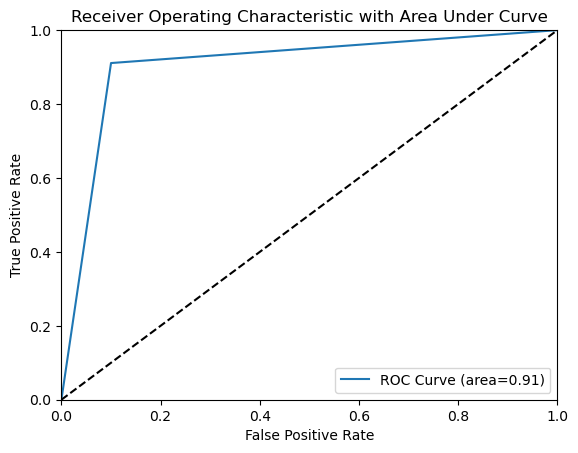

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_xgb)

plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" %xgb_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## SVM

In [51]:
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(x_train,y_train)

SVC()

In [70]:
#predictions
train_pred_svm = svm.predict(x_train)
test_pred_svm = svm.predict(x_test)

# Accuracy
print("Training Accuracy : ",accuracy_score(y_train,train_pred_svm))
train_accu.append(accuracy_score(y_train,train_pred_svm))
print()
print("Testing Accuracy : ",accuracy_score(y_test,test_pred_svm))
test_accu.append(accuracy_score(y_test,test_pred_svm))

Training Accuracy :  0.8386680825242718

Testing Accuracy :  0.8305016181229773


In [53]:
print(classification_report(y_train,train_pred_svm))
print()
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83     19782
           1       0.81      0.88      0.85     19770

    accuracy                           0.84     39552
   macro avg       0.84      0.84      0.84     39552
weighted avg       0.84      0.84      0.84     39552


              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4938
           1       0.80      0.88      0.84      4950

    accuracy                           0.83      9888
   macro avg       0.83      0.83      0.83      9888
weighted avg       0.83      0.83      0.83      9888



In [54]:
print(confusion_matrix(y_train,train_pred_svm))
print()
print(confusion_matrix(y_test,test_pred_svm))

[[15700  4082]
 [ 2299 17471]]

[[3843 1095]
 [ 581 4369]]


## Checking the accuracy of the models after using feature importance

In [55]:
X_train = pd.DataFrame(x_train, columns = X.columns)
X_test = pd.DataFrame(x_test, columns = X.columns)

In [56]:
global_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=False, inplace=True) 

In [57]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [58]:
global_importances

 relationship_Other                     0.432928
 Education_School                       0.058776
 capital-gain                           0.038830
 Education-num                          0.038094
 Education_College                      0.033013
 occupation_ Other-service              0.030252
 Education_Doctorate                    0.026808
Age                                     0.021793
 hours-per-week                         0.020710
 occupation_ Farming-fishing            0.019345
 occupation_ Exec-managerial            0.018592
 capital-loss                           0.016278
 occupation_ Handlers-cleaners          0.015296
 race_ White                            0.015087
Gender_ Male                            0.014702
 relationship_Wife                      0.010211
 marital-status_NotMarried              0.009959
 country_ United-States                 0.009505
Profession Class_ Self-emp-not-inc      0.009351
 occupation_ Prof-specialty             0.008327
Profession Class_ Lo

In [59]:
X_train_ft = X_train
X_test_ft = X_test

In [60]:
# Dropping the columns less important :
cols_to_remove= [' country_ Scotland',' country_ Portugal',' country_ Poland',' country_ Outlying-US(Guam-USVI-etc)',
                 ' country_ Thailand',' country_ Trinadad&Tobago', ' country_ Peru',' country_ Hong',' country_ Laos',
                 ' country_ Jamaica', ' country_ Iran',' country_ India', ' country_ Hungary',' country_ Honduras',
                 ' country_ Holand-Netherlands',' country_ Haiti',' country_ England',' country_ El-Salvador',
                 ' country_ Ecuador',' occupation_ Armed-Forces',' country_ Yugoslavia']

X_train_ft = X_train_ft.drop(cols_to_remove, axis = 1)
X_test_ft = X_test_ft.drop(cols_to_remove, axis = 1)

In [61]:
print(X_train_ft.shape)
X_test_ft.shape

(39552, 56)


(9888, 56)

In [62]:
# Checking Random Forest
rfr.fit(X_train_ft,y_train)

#predictions
train_pred_rfr = rfr.predict(X_train_ft)
test_pred_rfr = rfr.predict(X_test_ft)

# Acccuracy Score
print("Training Accuracy : ",accuracy_score(y_train,train_pred_rfr))
print("Testing Accuracy : ",accuracy_score(y_test,test_pred_rfr))

Training Accuracy :  0.9229621763754046

Testing Accuracy :  0.8809668284789643


In [63]:
# Checking XGBoost
xgb.fit(X_train_ft,y_train)

#Predictions
y_pred_train_xgb = xgb.predict(X_train_ft)
y_pred_test_xgb = xgb.predict(X_test_ft)

# Accuracy_Score
print("Training Accuracy", accuracy_score(y_train, y_pred_train_xgb))
print("Test Accuracy", accuracy_score(y_test, y_pred_test_xgb))

Training Accuracy 0.9203327265372169

Test Accuracy 0.905542071197411


# Finding the best model
 Accuracy Comparison of different algorithms on training data and testing data

In [71]:
algorithm = ['LogisticRegression','RandomForest', 'XGBOOST','SVM']
accu_data = {'Training Accuracy':train_accu, 'Test Accuracy':test_accu}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy
LogisticRegression,0.824282,0.825748
RandomForest,0.915908,0.877933
XGBOOST,0.920333,0.905542
SVM,0.838668,0.830502


In [76]:
# Mean Train and Test Accuracy :- 
algorithm_1 = ['LogisticRegression','RandomForest', 'XGBOOST']
accu_data_mean = {'Training_Mean_Accuracy':train_mean, 'Test_Mean_Accuracy':test_mean}
model_mean = pd.DataFrame(accu_data_mean, index = algorithm_1)
model_mean

,Training_Mean_Accuracy,Test_Mean_Accuracy
LogisticRegression,0.823144,0.819984
RandomForest,0.872927,0.863875
XGBOOST,0.904404,0.889664


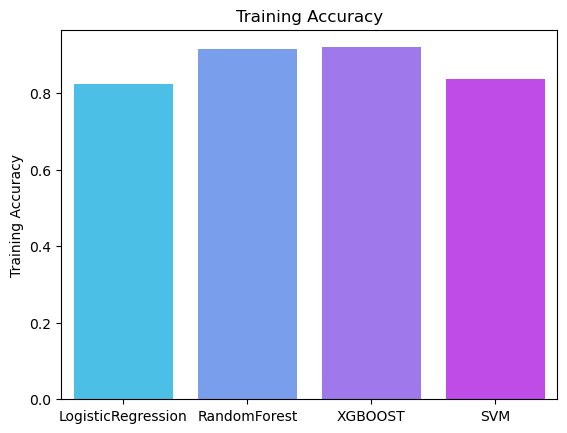

In [77]:
# Plotting the Training Accuracy of models
sns.barplot(model.index, model['Training Accuracy'], palette='cool')
plt.title("Training Accuracy")
plt.show()

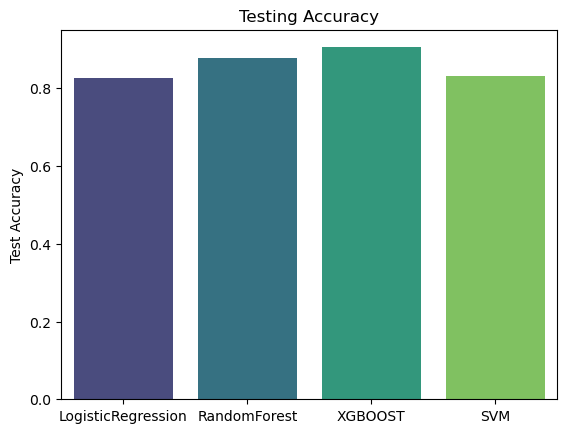

In [78]:
# # Plotting the Testing Accuracy of models
sns.barplot(model.index, model['Test Accuracy'],palette='viridis')
plt.title('Testing Accuracy')
plt.show()

# Conclusion
* In this project, I have done cleaning, analyzing, modelling of the dataset and applied various machine learnings models to predict the income level.


* XGBoost model is giving better training and testing accuracy. 


* Hypothesis testing was done on the dataset to see the relation of education and hours_per_week on the income level. In 2 cases  null hypothesis was rejected (relation between Education,Hours_per_week with income) while in 3rd case reation of income with Final_census null hypothesis was accepted.


* In analysis it was found that age, hours_per_week, gender, race, occupation, education has vital role to play in determining the income level of a person.


* This project can be used to analyze and make plans to elevate the income level of a person. Investing in education, changing the profession, incentives to female, more gender-equality favouring policy can be a better start.  

### Archana Tomar